# Human Activity Recognition from smartphone sensors

The human activity recognition has the data of 30 people from age 19-45 and study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

The objective is to classify activities into one of the six activities performed.

Each person performs six activities,

WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
Here SITTING, STANDING, LAYING comes under Static activities.

Whereas WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS comes under dynamic activities.

In [1]:
import numpy as np
import pandas as pd

In [2]:
!ls -l ~/cloudxlab_jupyter_notebooks/datasets/Human_activity_recognition/
!pwd

total 65884
-rw-r--r-- 1 rdanirhudhan3926 rdanirhudhan3926 19324796 Nov 25 07:01 test.csv
-rw-r--r-- 1 rdanirhudhan3926 rdanirhudhan3926 48138764 Nov 25 07:01 train.csv
/home/rdanirhudhan3926/cloudxlab_jupyter_notebooks


In [112]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV #For Optimising hyperparameter and cross-validation

# machine learning model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for error and accurary score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [4]:
import os

In [5]:
for dirname, _, filenames in os.walk('/home/rdanirhudhan3926/cloudxlab_jupyter_notebooks/datasets/Human_activity_recognition/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/rdanirhudhan3926/cloudxlab_jupyter_notebooks/datasets/Human_activity_recognition/test.csv
/home/rdanirhudhan3926/cloudxlab_jupyter_notebooks/datasets/Human_activity_recognition/train.csv


In [6]:
train = pd.read_csv('/home/rdanirhudhan3926/cloudxlab_jupyter_notebooks/datasets/Human_activity_recognition/train.csv')
test = pd.read_csv('/home/rdanirhudhan3926/cloudxlab_jupyter_notebooks/datasets/Human_activity_recognition/test.csv')

In [7]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [30]:
train.shape

(7352, 563)

In [31]:
test.shape

(2947, 563)

In [32]:
train.info()
# No Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [33]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


## Data Description

So the data is collected Using its embedded accelerometer and gyroscope,
captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz.

**What is accelerometer and gyroscope?**

* Accelerometers measure linear acceleration along one or several axis
* A gyroscope measures angular velocity (or rotation).

For subject columns it indicates 1-30 participants

### Exploratory Data Analysis

In [47]:
#Checking duplicates values in data
print('Number of duplicates in train:',sum(train.duplicated()))
print('Number of duplicates in test:',sum(test.duplicated()))

Number of duplicates in train: 0
Number of duplicates in test: 0


In [58]:
train.isna().sum().any() 
#shows that no null values

False

In [59]:
#Number of counts per activity performs by particpants
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

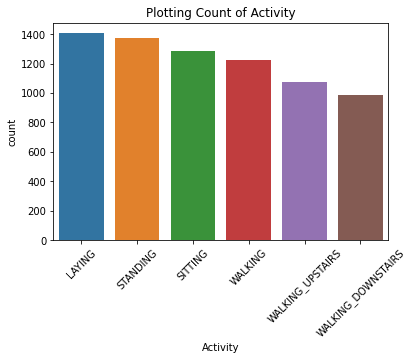

In [64]:
plt.title("Plotting Count of Activity")
sns.countplot(data = train , x = train.Activity , order = train.Activity.value_counts().index)
plt.xticks(rotation = 45)
plt.show()

There is a balance of data between different activity

**Getting Count of all the features** to get a better idea of features for further exploring.

In [70]:
# for col in train.columns:
#     print(col)
#     print(col.split('-'))
#     print(col.split('-')[0])
#     print(col.split('-')[0].split('(')[0])

features_dict = Counter([col.split('-')[0].split('(')[0] for col in train.columns])

In [71]:
features_dict

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [95]:
train.columns[train.columns.str.contains('Mag-mean')]
# Checking for mag-mean column names as mag-mean contains magnitude,
# magnitude is scalar quantity, which represents change in all axis x,y,z

Index(['tBodyAccMag-mean()', 'tGravityAccMag-mean()', 'tBodyAccJerkMag-mean()',
       'tBodyGyroMag-mean()', 'tBodyGyroJerkMag-mean()', 'fBodyAccMag-mean()',
       'fBodyAccMag-meanFreq()', 'fBodyBodyAccJerkMag-mean()',
       'fBodyBodyAccJerkMag-meanFreq()', 'fBodyBodyGyroMag-mean()',
       'fBodyBodyGyroMag-meanFreq()', 'fBodyBodyGyroJerkMag-mean()',
       'fBodyBodyGyroJerkMag-meanFreq()'],
      dtype='object')

##### Analysing tBodyAccMag-mean

In [80]:
# train[train['Activity']=='WALKING']['tBodyAccMag-mean()']

78     -0.224560
79     -0.126503
80     -0.160100
81     -0.073513
82     -0.049492
          ...   
7289   -0.102923
7290   -0.108949
7291   -0.134020
7292   -0.129577
7293   -0.155654
Name: tBodyAccMag-mean(), Length: 1226, dtype: float64

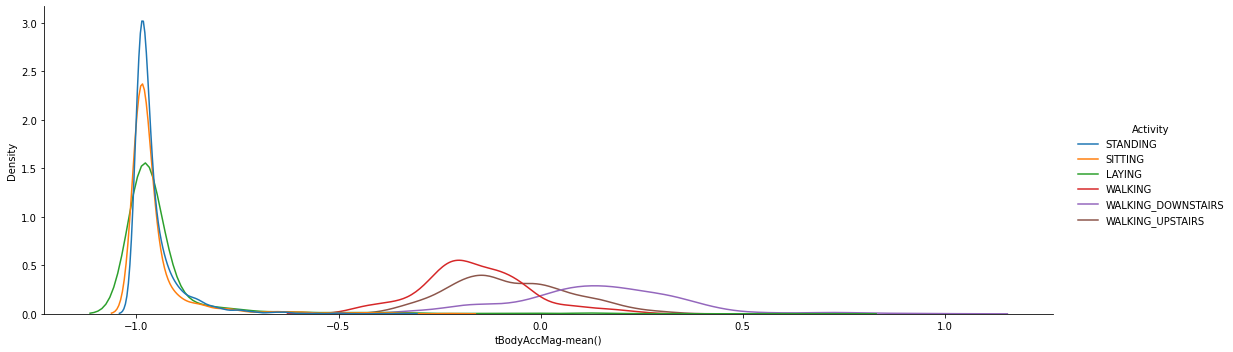

In [101]:
sns.displot(data=train, x='tBodyAccMag-mean()', hue='Activity', kind='kde', aspect =3)
plt.show()

The Plot has 2 peaks, i.e. most accurance of values, showing respective activity.

To get better we can use 2 plots, 
1. one with static activities (Standing, sitting, lying)
2. Other with Dynamic activities (walking, walking_downstairs, walking_upstairs)

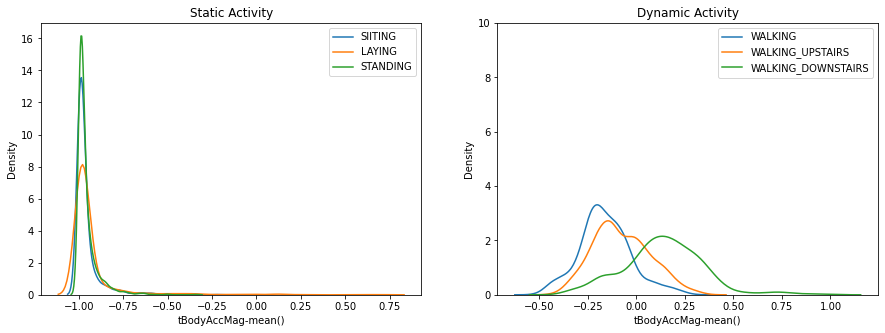

In [105]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Static Activity")
sns.distplot(train[train['Activity']=='SITTING']['tBodyAccMag-mean()'] , hist = False, label = "SIITING")
sns.distplot(train[train['Activity']=='LAYING']['tBodyAccMag-mean()'] , hist = False ,label = "LAYING")
sns.distplot(train[train['Activity']=='STANDING']['tBodyAccMag-mean()'] , hist = False, label = "STANDING")
plt.legend()

plt.subplot(1,2,2)
plt.title("Dynamic Activity")

sns.distplot(train[train['Activity']=='WALKING']['tBodyAccMag-mean()'] , hist = False, label = "WALKING")
sns.distplot(train[train['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'] , hist = False ,label = "WALKING_UPSTAIRS")
sns.distplot(train[train['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'] , hist = False, label = "WALKING_DOWNSTAIRS")
plt.ylim(0, 10)
plt.legend()

plt.show()

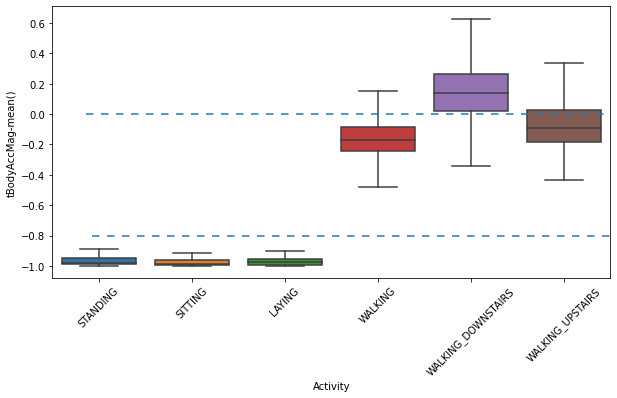

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Activity' , y = 'tBodyAccMag-mean()' , data = train , showfliers=False)
plt.xticks(rotation = 45)
plt.axhline(y=-.8, xmin=0.07 , dashes = (5,5))
plt.axhline(y=0, xmin=0.06 ,  dashes = (5,5))


plt.show()

* From the boxplot mean less than -0.8 will be static activites
* And mean more than 1 activity are highly dynamic which means in WALKING_DOWNSTAIRS has max mean acceleration because 2 factors plays in it acceleration and Acceleration due to gravity(which applies downwards). 
* Thats why WALKING_DOWNSTAIRS has maximun mean accleration.
* Standing , sitting and laying has least mean acceleration due to minimal body movement in these positions

##### Visualising through scatterPlot after Using Decomposition

Here, Principal Component Analysis is used to reduce dimensions i.e to transform high dimensions to lower dimensions

Multi or High Dimensional Data is difficult for visualising, so we are reducing dimension to 2 for better visualising.

In [12]:
from sklearn.decomposition import PCA # for decomposition

In [15]:
x_train_before_pca = train.drop(['subject','Activity'] , axis =1)

In [16]:
pca = PCA(n_components= 2 , random_state=42)
X_train_pca = pca.fit_transform(x_train_pca)

In [28]:
X_train_pca.shape

(7352, 2)

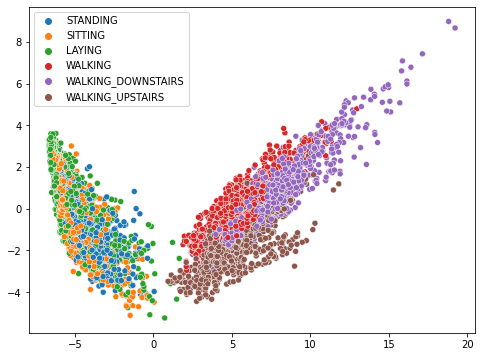

In [27]:
plt.figure(figsize=(8,6))

# Plot the transformed training points
sns.scatterplot(X_train_pca[:, 0], y=X_train_pca[:, 1], hue = train['Activity'])
plt.legend()

plt.show()

**Just like our previous inference, the activities data are largely divided into 2 categories:**
* **Static**
* **Dynamic**

In [ ]:
# Plot the decision boundary of the classifier
# DecisionBoundaryDisplay.from_estimator(DT_model, X_train_pca, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

In [29]:
# Dropping Activity from x_train as it is label, and dropping subject as it is not feature that can be used from 
# making predictions.

x_train = train.drop(['subject','Activity'] , axis =1)
y_train = train.Activity

x_test = test.drop(['subject','Activity'] , axis =1)
y_test = test.Activity

In [30]:
print(x_test.shape , y_test.shape)
print(x_train.shape , y_train.shape)

(2947, 561) (2947,)
(7352, 561) (7352,)


In [32]:
x_train,y_train

(      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
 0              0.288585          -0.020294          -0.132905   
 1              0.278419          -0.016411          -0.123520   
 2              0.279653          -0.019467          -0.113462   
 3              0.279174          -0.026201          -0.123283   
 4              0.276629          -0.016570          -0.115362   
 ...                 ...                ...                ...   
 7347           0.299665          -0.057193          -0.181233   
 7348           0.273853          -0.007749          -0.147468   
 7349           0.273387          -0.017011          -0.045022   
 7350           0.289654          -0.018843          -0.158281   
 7351           0.351503          -0.012423          -0.203867   
 
       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
 0            -0.995279         -0.983111         -0.913526         -0.995112   
 1            -0.998245         -0.975300   

### Preparing Model

#### Logistic Regression

Instead of using the Logistic regression with default parameters, we will use hyperparameter tunning cross validation and in our model will increase its accuracy.

Cross-validation is used when you need to compare the efficacy of various hyperparameter settings throughout the tuning process.

Here cv = 10 so that it will iterate through the data 10 times in such a way that changes and divides data into different custers every time it iter.

And parameter are 100 200 500 which will iterate these in every time in cv and check which parameter has better accuracy

In [33]:
parameters = {'max_iter' : [100,200,500]}

lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier , param_distributions = parameters, 
                                      cv = 10 , random_state = 42)
lr_classifier_rs.fit(x_train , y_train)
# y_pred = lr_classifier_rs.predict(x_test)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'max_iter': [100, 200, 500]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [36]:
print(lr_classifier_rs.best_params_)
print(lr_classifier_rs.best_score_)
lr_classifier_rs.best_estimator_

{'max_iter': 500}
0.9481835995267671


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = lr_classifier_rs.predict(x_test)

In [38]:
lr_model_accuracy =  accuracy_score(y_true = y_test , y_pred = y_pred)
print("Accurarcy of the ML model :",round((lr_model_accuracy)*100 , 3))

Accurarcy of the ML model : 96.098


In [67]:
confusion_matrix_lr = confusion_matrix(y_true = y_test , y_pred = y_pred)

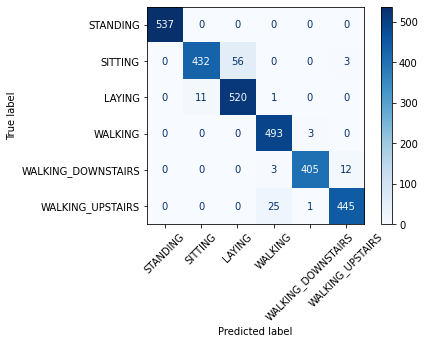

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr , display_labels= train.Activity.unique())
disp.plot(cmap ='Blues', values_format='.0f')
plt.xticks(rotation = 45)
plt.show()

Accuracy of model is 96%.

The model is able to predict Standing (100%) and Walking (99.39%) accurately.

But it makes small error in:
* Sitting = 89.87%
* Laying = 97.74%
* Walking_upstairs = 94.47%
* Walking_Downstairs = 96.42%

#### Decision Tree
with hyperparameter tuning by using RandomisedSearch

In [104]:
parameters = {'max_depth' : [100,200,500]
             }

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier , param_distributions = parameters, 
                                      cv = 10 , random_state = 42,n_jobs = -1)
dt_classifier_rs.fit(x_train , y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [105]:
print(dt_classifier_rs.best_params_)
print(dt_classifier_rs.best_score_)
dt_classifier_rs.best_estimator_

{'max_depth': 500}
0.8491671638063792


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=500, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
y_pred_dt = dt_classifier_rs.predict(x_test)

In [107]:
dt_model_accuracy =  accuracy_score(y_true = y_test , y_pred = y_pred_dt)
print("Accurarcy of the ML model :",round((dt_model_accuracy)*100 , 3))

Accurarcy of the ML model : 86.393


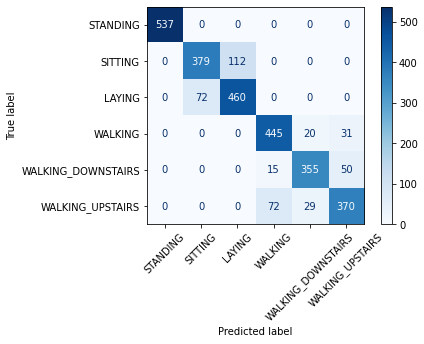

In [110]:
cm = confusion_matrix(y_true = y_test , y_pred = y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels= train.Activity.unique())
disp.plot(cmap ='Blues', values_format='.0f')
plt.xticks(rotation = 45)
plt.show()

This DecisionTree Model is only ~ 86% accurate

#### RandomForest Classifier

In [113]:
parameters = {'max_depth' : [100,200,500]
              ,'min_samples_leaf' : [None,10,20,45,75,100]
              ,'criterion':['entropy','gini']
             }

rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier , param_distributions = parameters, 
                                      cv = 10 , random_state = 42,n_jobs = -1)
rf_classifier_rs.fit(x_train , y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [114]:
print(rf_classifier_rs.best_params_)
print(rf_classifier_rs.best_score_)
rf_classifier_rs.best_estimator_

{'min_samples_leaf': 10, 'max_depth': 500, 'criterion': 'entropy'}
0.931318951493641


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
y_pred_rf = rf_classifier_rs.predict(x_test)

In [116]:
dt_model_accuracy =  accuracy_score(y_true = y_test , y_pred = y_pred_rf)
print("Accurarcy of the ML model :",round((dt_model_accuracy)*100 , 3))

Accurarcy of the ML model : 92.671


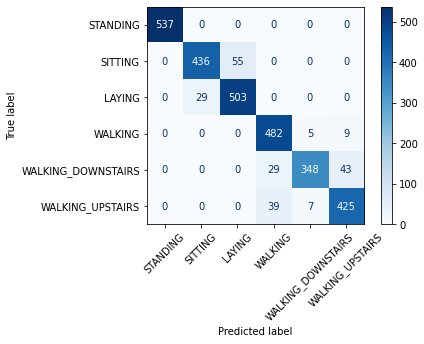

In [117]:
cm = confusion_matrix(y_true = y_test , y_pred = y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels= train.Activity.unique())
disp.plot(cmap ='Blues', values_format='.0f')
plt.xticks(rotation = 45)
plt.show()

#### Using SVM 

In [118]:
parameters = {'max_iter' : [100,200,500]}

svc_classifier = SVC(kernel = 'sigmoid')
svc_classifier_rs = RandomizedSearchCV(svc_classifier , param_distributions = parameters, 
                                      cv = 10 , random_state = 42,n_jobs=-1)
svc_classifier_rs.fit(x_train , y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='sigmoid', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'max_iter': [100, 200, 500]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [119]:
print(svc_classifier_rs.best_params_)
print(svc_classifier_rs.best_score_)
svc_classifier_rs.best_estimator_

{'max_iter': 500}
0.8151569432120673


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=500, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [120]:
y_pred_svc = svc_classifier_rs.predict(x_test)

In [121]:
svc_model_accuracy =  accuracy_score(y_true = y_test , y_pred = y_pred_svc)
print("Accurarcy of the ML model :",round((svc_model_accuracy)*100 , 3))

Accurarcy of the ML model : 80.624


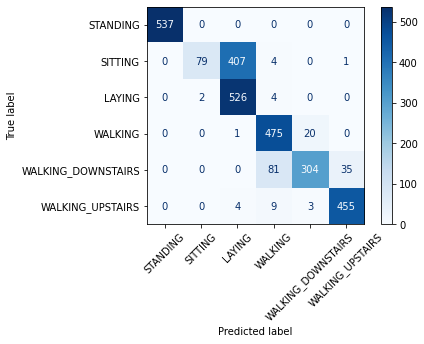

In [122]:
cm = confusion_matrix(y_true = y_test , y_pred = y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels= train.Activity.unique())
disp.plot(cmap ='Blues', values_format='.0f')
plt.xticks(rotation = 45)
plt.show()

Model Has Accuracy of only 80%

### Conclusion
So prepared 3 models using different Algorithm Decision Tree , Logistic Regression , Random Forest and SVC

Logistic regression has given Highest accuracy score in this scenario. It gives 96% accuracy which means accelerometer and gyroscope sensor makes 96% right predictions in Logistic regression.